[*********************100%***********************]  6 of 6 completed


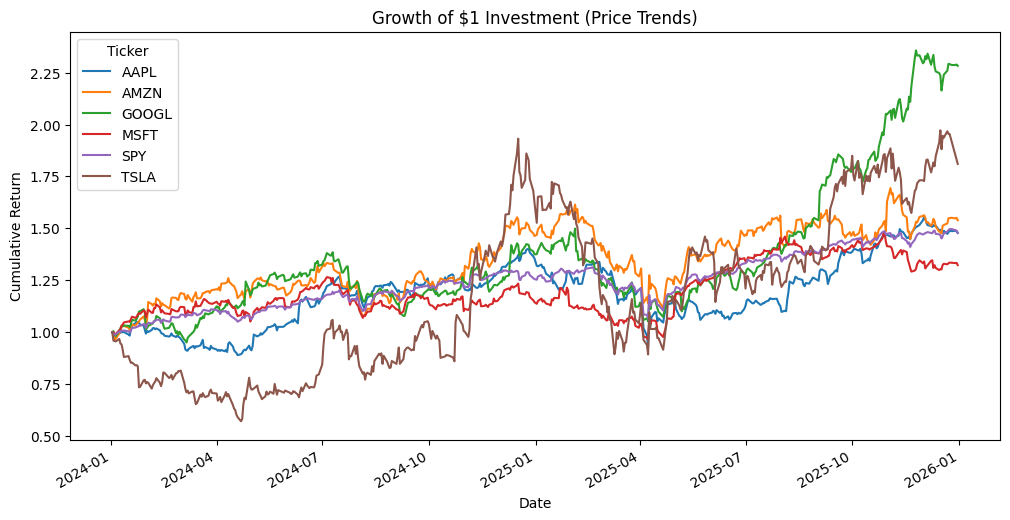

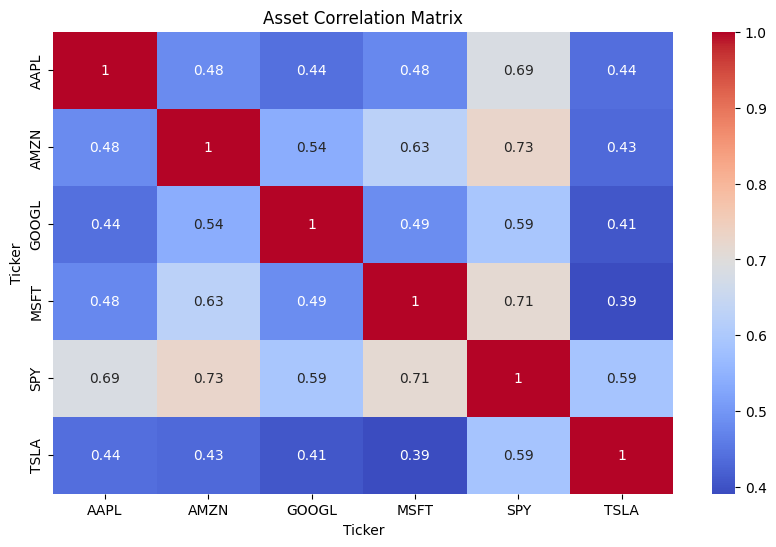

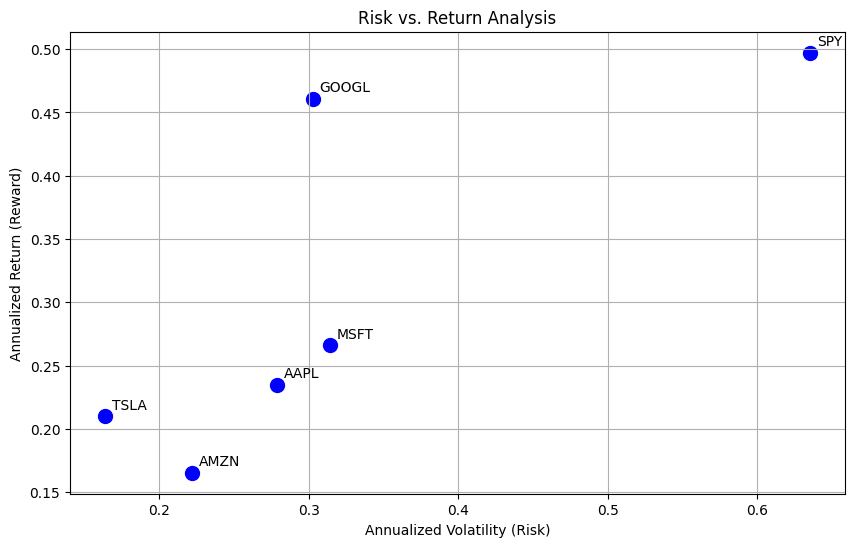

In [1]:
"""
MARKET TRACKER & PORTFOLIO ANALYTICS
Developed by: Roman Raspopa
Purpose: Automated Financial Analysis & Risk Visualization
"""

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def get_price_data(ticker_list, start_date, end_date):
    """Retrieves and cleans historical daily closing prices."""
    raw_data = yf.download(ticker_list, start=start_date, end=end_date)['Close']
    return raw_data.ffill()

def get_metrics(price_df):
    """Calculates Returns, Volatility, and Sharpe Ratio."""
    returns = price_df.pct_change().dropna()
    
    # 1. Computing Metrics (Annualized)
    ann_return = returns.mean() * 252
    ann_volatility = returns.std() * np.sqrt(252)
    sharpe = (ann_return - 0.02) / ann_volatility
    
    return returns, ann_return, ann_volatility, sharpe

# --- Execution & Scope Implementation ---
assets = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "SPY"] # SPY is the market benchmark
prices = get_price_data(assets, "2024-01-01", "2026-01-01")
returns, ann_return, ann_volatility, sharpe = get_metrics(prices)

# --- VISUALIZATION 1: PRICE TRENDS ---
# This shows how $1 invested in each stock would have grown
(prices / prices.iloc[0]).plot(figsize=(12, 6))
plt.title("Growth of $1 Investment (Price Trends)")
plt.ylabel("Cumulative Return")
plt.grid(False)
plt.show()

# --- VISUALIZATION 2: CORRELATION HEATMAP ---
plt.figure(figsize=(10, 6))
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Asset Correlation Matrix")
plt.show()

# --- VISUALIZATION 3: RISK-RETURN PLOT ---
# This is the 'Solid Project' differentiator
plt.figure(figsize=(10, 6))
plt.scatter(ann_volatility, ann_return, s=100, color='blue')

# Label each point with the ticker name
for i, ticker in enumerate(assets):
    plt.annotate(ticker, (ann_volatility.iloc[i], ann_return.iloc[i]), xytext=(5,5), textcoords='offset points')

plt.title("Risk vs. Return Analysis")
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return (Reward)")
plt.grid(True)
plt.show()